In [1]:
import numpy as np
import matplotlib.pyplot as plt

from ddfUtils import *
from ddfRoot import *
from sndUtils import *
from mplStyling import *
import uproot

plt.style.use("root")

Welcome to JupyROOT 6.28/12


In [9]:
runs = [7080, 10241]

In [10]:
zRefArr = np.array([350, 375, 400, 425, 435, 440, 445, 450, 455, 460, 465, 470, 475, 480, 485, 490, 495, 500, 505, 510, 515, 520, 525, 550], dtype=np.float64)

In [11]:
trkeff = {}
for run in runs: 
    trkeff[run] = {}
    
    for tt in (1, 11, 3, 13):
        trkeff[run][f"eff{tt}"] = []
        trkeff[run][f"effErr{tt}"] = []

In [ ]:
for run in runs:
    for zRef in zRefArr:

        for tt in (1, 11, 3, 13):
            rootFile = uproot.open(f"/eos/user/i/idioniso/mfout/trkeff/trkeff-Zref/run_{run:06d}/trkeff_Run{run}_noTagRestr_noCandRestr_zRef.{zRef:g}_tc.root")

            eff    = rootFile[f"eff_{tt}_data.tc"].arrays()["eff"][0]
            effErr = rootFile[f"eff_{tt}_data.tc"].arrays()["effErr"][0]

            trkeff[run][f"eff{tt}"].append(eff)
            trkeff[run][f"effErr{tt}"].append(effErr)

    trkeff[run] = pd.DataFrame(trkeff[run])
    trkeff[run]["zRef"] = zRefArr
trkeff[7080].head()

findfont: Font family ['cursive'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'cursive' not found because none of the following families were found: Apple Chancery, Textile, Zapf Chancery, Sand, Script MT, Felipa, Comic Neue, Comic Sans MS, cursive


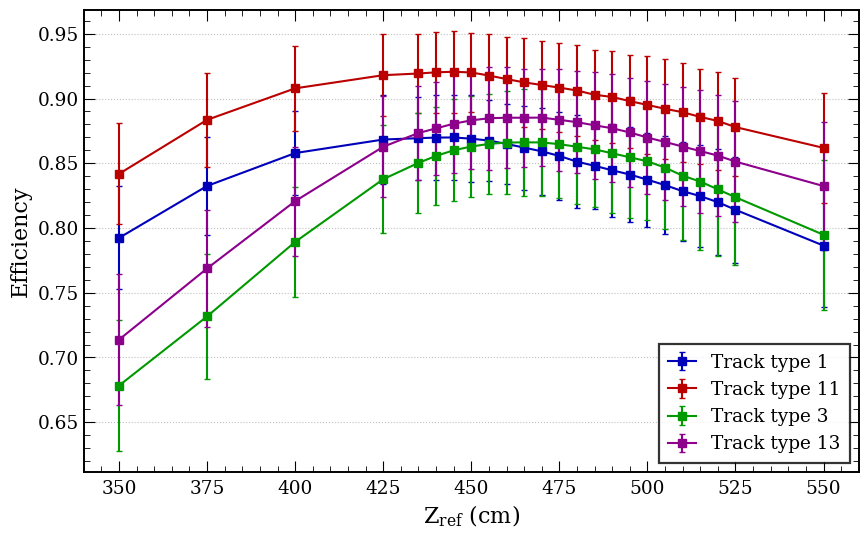

In [ ]:
RUN = 10241

plt.figure(figsize=(10, 6))
for tt in (1, 11, 3, 13):
    x = trkeff[run]["zRef"]
    y = trkeff[run][f"eff{tt}"]
    yerr = trkeff[run][f"effErr{tt}"]

    lower = np.minimum(yerr, y)
    upper = np.minimum(yerr, 1 - y)

    plt.errorbar(x, y, yerr=[lower, upper], label=f"Track type {tt}", capsize=2, marker="s")

plt.xlabel("$Z_{ref}$ (cm)")
# plt.xscale("log")
# plt.xlim(10, 30)
plt.ylabel("Efficiency")
plt.grid(axis="y")
plt.legend()
plt.show()